In [1]:
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = ak.from_parquet("~/reco_p8_ee_ZH_Htautau_ecm380_201102.parquet")

In [3]:
#jets
jet_vec = vector.awk(ak.zip({
    "px": d["reco_jet_p4s"].x,
    "py": d["reco_jet_p4s"].y,
    "pz": d["reco_jet_p4s"].z,
    "mass": d["reco_jet_p4s"].tau}))

#particles in each jet
ptcl_vec = vector.awk(ak.zip({
    "px": d["reco_cand_p4s"].x,
    "py": d["reco_cand_p4s"].y,
    "pz": d["reco_cand_p4s"].z,
    "mass": d["reco_cand_p4s"].tau}))

In [4]:
def deltaphi(phi1, phi2):
    diff = phi1 - phi2
    return np.arctan2(np.sin(diff), np.cos(diff))

In [5]:
#compute the eta difference between particles in the jet, and the jet
ptcl_deta = ptcl_vec.eta - jet_vec.eta
#ptcl_dphi = (ptcl_vec - jet_vec).phi
ptcl_dphi = deltaphi(ptcl_vec.phi, jet_vec.phi)

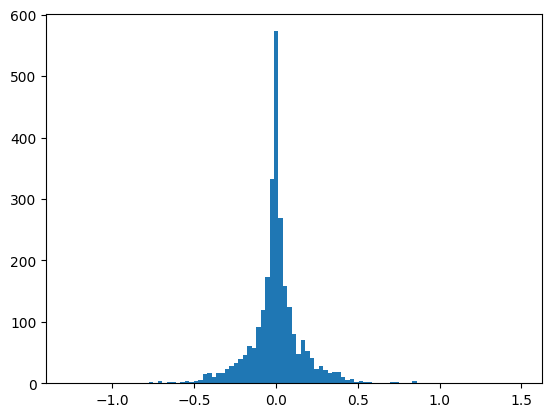

In [6]:
plt.hist(ak.flatten(ptcl_deta), bins=101);

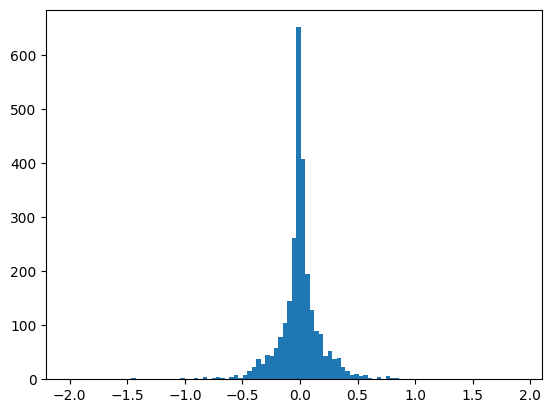

In [7]:
plt.hist(ak.flatten(ptcl_dphi), bins=101);

In [8]:
bins_eta = np.linspace(-1, 1, 11)
bins_phi = np.linspace(-1, 1, 11)

In [9]:
bin_idx_eta = ak.unflatten(np.searchsorted(bins_eta, ak.flatten(ptcl_deta)), ak.count(ptcl_deta, axis=-1), axis=-1)
bin_idx_phi = ak.unflatten(np.searchsorted(bins_phi, ak.flatten(ptcl_dphi)), ak.count(ptcl_dphi, axis=-1), axis=-1)

In [10]:
images_energy = np.zeros((len(ptcl_vec), len(bins_eta)+1, len(bins_phi)+1))
for i in range(len(ptcl_vec)):
    for bin0, bin1, e in zip(bin_idx_eta[i], bin_idx_phi[i], ptcl_vec.energy[i]):
        images_energy[i][bin0, bin1] += e

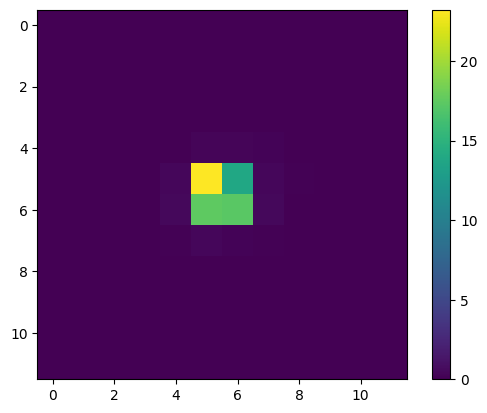

In [11]:
plt.imshow(np.mean(images_energy, axis=0));
plt.colorbar()

In [12]:
images_count = np.zeros((len(ptcl_vec), len(bins_eta)+1, len(bins_phi)+1))
for i in range(len(ptcl_vec)):
    for bin0, bin1 in zip(bin_idx_eta[i], bin_idx_phi[i]):
        images_count[i][bin0, bin1] += 1

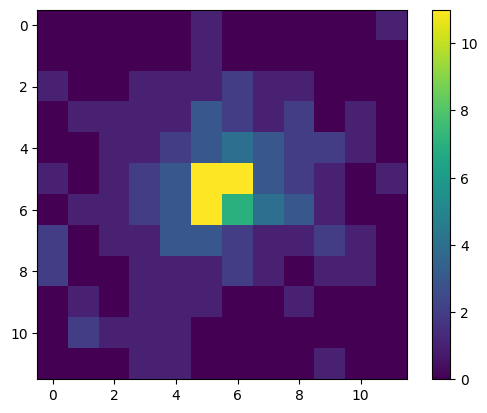

In [13]:
plt.imshow(np.max(images_count, axis=0));
plt.colorbar()

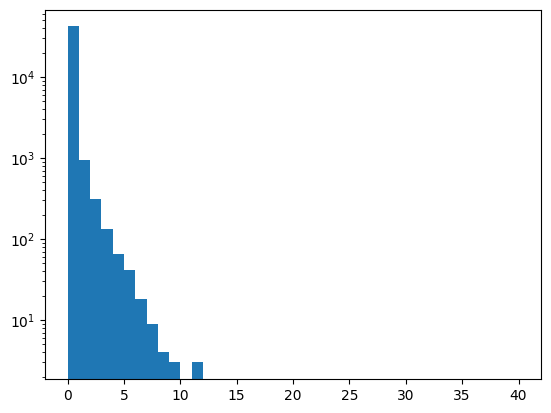

In [14]:
b = np.linspace(0,40,41)
plt.hist(images_count.flatten(), bins=b);
plt.yscale("log")